In [3]:
# Import Libraries
from mpose import MPOSE
import numpy as np
import matplotlib.pyplot as plt
from mpose.utils import plot_pose

In [4]:
# Set dataset output path
data_dir = './tmp2/'

In [5]:
# Create MPOSE2021 dataset object
dataset = MPOSE(pose_extractor='openpose', 
                split=1, 
                #preprocess=None, 
                velocities=True, 
                remove_zip=False)

Initializing MPOSE2021 with openpose Pose Extractor
File exists in /home/salik/.mpose/openpose.zip. specify overwrite=True if intended
Extracting Data...
File exists in /home/salik/.mpose/openpose/. specify overwrite=True if intended


In [7]:

# Restore original data format
#dataset.add_velocities()
dataset.reduce_keypoints()
#dataset.remove_confidence()
#dataset.scale_to_unit()
#dataset.scale_and_center()
dataset.remove_confidence()
#dataset.prune()
X_train, y_train, X_test, y_test = dataset.get_data()
print(X_train.shape, X_test.shape)

#dataset.get_info()
dataset.flatten_features()

'''
dataset.reset_data()
dataset.get_info()
dataset.reduce_keypoints()
dataset.scale_to_unit()
dataset.add_velocities()
dataset.reduce_keypoints()
dataset.remove_confidence()
dataset.get_info()
#dataset.scale_and_center()
#dataset.remove_confidence()
#dataset.get_info()
dataset.flatten_features()
'''

Poses already scaled. Please call reduce_keypoints() only before scale_and_center()!
(12562, 30, 51) (2867, 30, 51)


'\ndataset.reset_data()\ndataset.get_info()\ndataset.reduce_keypoints()\ndataset.scale_to_unit()\ndataset.add_velocities()\ndataset.reduce_keypoints()\ndataset.remove_confidence()\ndataset.get_info()\n#dataset.scale_and_center()\n#dataset.remove_confidence()\n#dataset.get_info()\ndataset.flatten_features()\n'

In [8]:
# Print dataset labels
dataset.get_labels()

{'standing': 0,
 'check-watch': 1,
 'cross-arms': 2,
 'scratch-head': 3,
 'sit-down': 4,
 'get-up': 5,
 'turn': 6,
 'walk': 7,
 'wave1': 8,
 'box': 9,
 'kick': 10,
 'point': 11,
 'pick-up': 12,
 'bend': 13,
 'hands-clap': 14,
 'wave2': 15,
 'jog': 16,
 'jump': 17,
 'pjump': 18,
 'run': 19}

In [9]:
# Save samples as numpy arrays
X_train, y_train, X_test, y_test = dataset.get_data()
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(12562, 30, 51) (12562,) (2867, 30, 51) (2867,)


In [10]:
# Plot a single pose
#pose = X_train[1000,15,:,:]
#plot_pose(pose)

type(X_train)
X_train.shape[0]

12562

In [11]:
#dataset.flatten_features()

In [12]:
X_train, y_train, X_test, y_test = dataset.get_data()
print(X_train.shape, X_test.shape)

(12562, 30, 51) (2867, 30, 51)


In [13]:
num=2330
pose = X_train[num]
print(np.shape(pose))
print(y_train[num])

print((pose[0]))

(30, 51)
14
[ 0.06563033 -0.10520755  0.06563033 -0.10520755 -0.07293251  0.0270259
 -0.07293251  0.0270259  -0.07291577  0.20041926 -0.07291577  0.20041926
  0.05414111  0.13631301  0.05414111  0.13631301  0.08147964 -0.01796516
  0.08147964 -0.01796516  0.10908614  0.1728016   0.10908614  0.1728016
  0.20956374  0.09103724  0.20956374  0.09103724 -0.02765674  0.35525012
 -0.02765674  0.35525012 -0.00978091  0.61925086 -0.00978091  0.61925086
 -0.02312777  0.89479245 -0.02312777  0.89479245  0.0638327   0.34650201
  0.0638327   0.34650201  0.05417461  0.61039668  0.05417461  0.61039668
  0.04525484  0.84500585  0.04525484]


In [14]:
res = []
item = pose
print("one", np.shape(item) )
kp=np.shape(item)[1] // 4
print("kp", kp )
for one in item:
    xx=[]
    yy=[]
    for i in range(0, len(one), 4):
        if i + 1 < len(one):
            xx.append( one[i] )
            yy.append( one[i+1] )
    temp=[]
    for i in range( np.shape(item)[1]//4 ):
        temp.append( [xx[i],yy[i]] )
    res.append(temp)
print( np.shape(res) )

one (30, 51)
kp 12
(30, 12, 2)


In [15]:
def draw_skeleton2(points,kp,figsize=(8,8)):
    fig, ax = plt.subplots(figsize=figsize)
    labels = np.arange(len(points))
    offset = -0.05
    # Define the bone connections
    if kp==13:
        #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
        bones = [ (0,1), (1,2), (1,4), (2,3), (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
        
    else:
        bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (1,8), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
        #bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (2,9), (5,12), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
    # Draw the bones
    for bone in bones:
        x = [points[bone[0]][0], points[bone[1]][0]]
        y = [points[bone[0]][1], points[bone[1]][1]]
        #if x=0 and y=0:
        #    pass
        ax.plot(x, y, linewidth=2, color='red')

    # Draw the keypoints
    for i in range(len(points)):
        x, y = points[i]
        #if x==0 and y==0:
        #    pass
        ax.scatter(x, y, s=50, color='blue')
        
    for i, label in enumerate(labels):
        ax.text(points[i][0], points[i][1]  + offset , label, ha='center', va='center')

    # Set the x and y limits
    x_min = min(points, key=lambda x: x[0])[0] - .5
    x_max = max(points, key=lambda x: x[0])[0] + .5
    y_min = min(points, key=lambda x: x[1])[1] - .5
    y_max = max(points, key=lambda x: x[1])[1] + .5
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

    # Show the plot
    plt.gca().invert_yaxis()
    plt.show()

12


IndexError: list index out of range

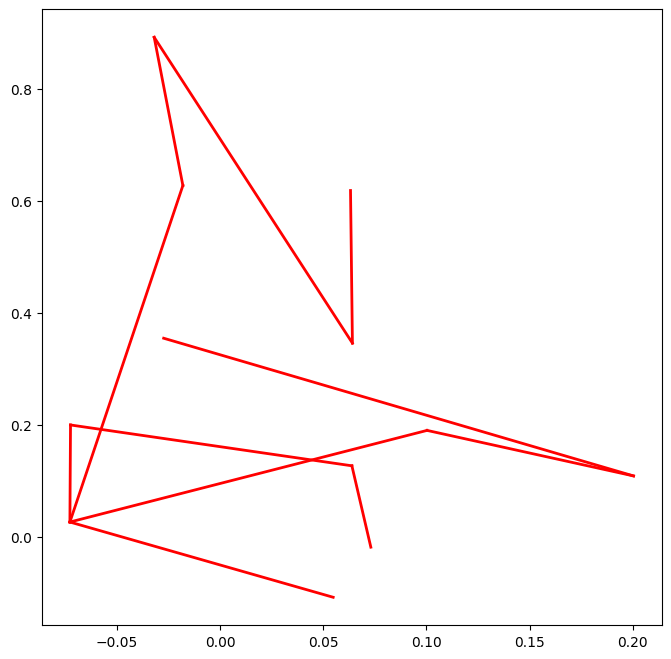

In [16]:
print(len(res[1]))
draw_skeleton2(res[1],kp)

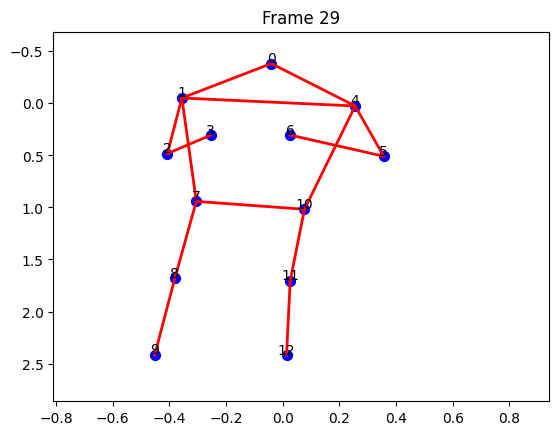

In [90]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline 

# Define your 30 frames of 13 points each in a 3D numpy array
#frames = np.random.rand(30, 13, 2) * 100

frames= np.array(res)


# Define a function that will update the plot for each frame of the animation
def animate(i):
    plt.cla() # Clear the previous plot
    # Plot the 13 points for the i-th frame
    x = frames[i,:,0]
    y = frames[i,:,1]
    #plt.scatter(x, y, s=50, color='blue')
    labels = np.arange(len(frames[i,:,0]))
    kp=len(frames[i,:,0])  
    offset = -0.05
    # Create a mask for non-zero keypoint values
    #mask = np.logical_and(x != 0.0, y != 0.0)
    #mask = (x != 0) & (y != 0)
    mask = (x != 0) | (y != 0)


    # Extract non-zero keypoint values using the mask
    x_nonzero = x[mask]
    y_nonzero = y[mask]

    # Plot the non-zero keypoint values
    plt.scatter(x_nonzero, y_nonzero, s=50, color='blue')
    
    for j, label in enumerate(labels):
        plt.text(x[j], y[j]  + offset , label, ha='center', va='center')
    
    
    if kp==13:
        #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
        bones = [ (0,1), (1,2), (1,4), (2,3), (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
    else:
        bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (1,8), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
        #bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (2,9), (5,12), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
        
    # Draw the bones
    #for bone in bones:
    #    x = [frames[i,bone[0],[0]], frames[i,bone[1],[0]]]
    #    y = [frames[i,bone[0],[1]], frames[i,bone[1],[1]]]
    #    #if x==0 and y==0:
    #    #    pass
    #    #print("x=",np.shape(x))
    #    plt.plot(x, y, linewidth=2, color='red')
        
    for bone in bones:
        kp1 = bone[0]
        kp2 = bone[1]
        x1, y1 = frames[i, kp1]
        x2, y2 = frames[i, kp2]
        if x1 == 0 and y1 == 0:
            continue  # skip bone if first keypoint is at (0,0)
        if x2 == 0 and y2 == 0:
            continue  # skip bone if second keypoint is at (0,0)
        plt.plot([x1, x2], [y1, y2], linewidth=2, color='red')

    # Set the x and y limits
    x_min = np.min(frames[:,:,0]) - .25
    x_max = np.max(frames[:,:,0]) + .25
    y_min = np.min(frames[:,:,1]) - .25
    y_max = np.max(frames[:,:,1]) + .25
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    
    # Set the plot title
    plt.title(f"Frame {i}")
    plt.gca().invert_yaxis()
    


# Create the animation using the FuncAnimation function
ani = animation.FuncAnimation(plt.gcf(), animate, frames=range(30), interval=100)
from IPython.display import HTML
#HTML(ani.to_jshtml())
#ani.save('animation.mp4', writer='ffmpeg', fps=30)
# Show the animation
#plt.show()

html = ani.to_html5_video()
HTML(html)

In [17]:
import numpy as np
data = np.load('utils/pos_emb.npy')

In [18]:
np.shape(data)

(13, 13)

In [19]:
np.shape(data)

(13, 13)

In [20]:

def creat_adj_mat():
    # Define the OpenPose reduced model body parts in the correct order
    reduced_body_parts = [
        'neck', 
        'right_shoulder', 'right_elbow', 'right_wrist', 
        'left_shoulder', 'left_elbow', 'left_wrist', 
        'right_hip', 'right_knee', 'right_ankle', 
        'left_hip', 'left_knee', 'left_ankle'
    ]

    # Define the connections between body parts
    reduced_connections = [
        [0, 1], [1, 2], [2, 3], 
        [0, 4], [4, 5], [5, 6], 
        [0, 7], [7, 8], [8, 9], 
        [0, 10], [10, 11], [11, 12]
    ]

    # Create the adjacency list
    adjacency_list = {}
    for i, body_part in enumerate(reduced_body_parts):
        adjacency_list[body_part] = []
        for connection in reduced_connections:
            if connection[0] == i:
                adjacency_list[body_part].append({
                    'body_part': reduced_body_parts[connection[1]],
                    'x': None,
                    'y': None,
                    'vx': None,
                    'vy': None
                })

    # Print the adjacency list
    print(adjacency_list)

In [21]:
creat_adj_mat()

{'neck': [{'body_part': 'right_shoulder', 'x': None, 'y': None, 'vx': None, 'vy': None}, {'body_part': 'left_shoulder', 'x': None, 'y': None, 'vx': None, 'vy': None}, {'body_part': 'right_hip', 'x': None, 'y': None, 'vx': None, 'vy': None}, {'body_part': 'left_hip', 'x': None, 'y': None, 'vx': None, 'vy': None}], 'right_shoulder': [{'body_part': 'right_elbow', 'x': None, 'y': None, 'vx': None, 'vy': None}], 'right_elbow': [{'body_part': 'right_wrist', 'x': None, 'y': None, 'vx': None, 'vy': None}], 'right_wrist': [], 'left_shoulder': [{'body_part': 'left_elbow', 'x': None, 'y': None, 'vx': None, 'vy': None}], 'left_elbow': [{'body_part': 'left_wrist', 'x': None, 'y': None, 'vx': None, 'vy': None}], 'left_wrist': [], 'right_hip': [{'body_part': 'right_knee', 'x': None, 'y': None, 'vx': None, 'vy': None}], 'right_knee': [{'body_part': 'right_ankle', 'x': None, 'y': None, 'vx': None, 'vy': None}], 'right_ankle': [], 'left_hip': [{'body_part': 'left_knee', 'x': None, 'y': None, 'vx': None,

(13, 2)


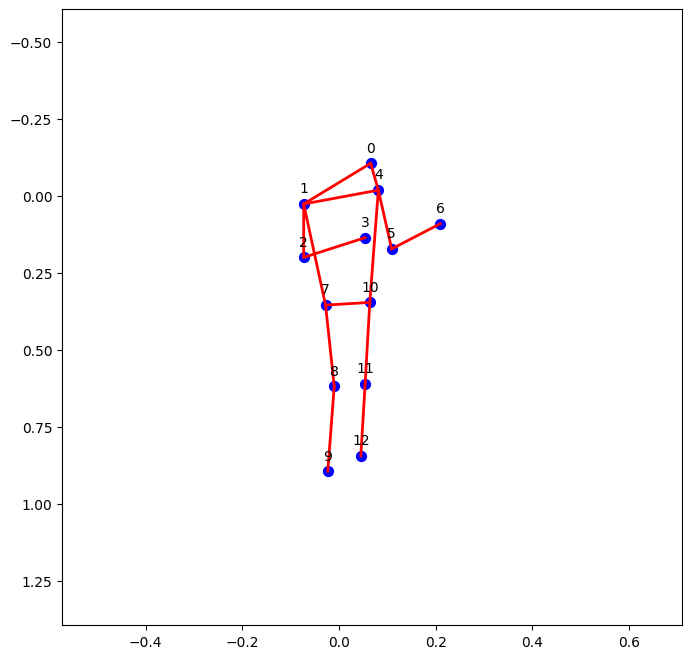

In [95]:
res2=[[0.06563032905855135, -0.1052075514420585], [-0.07293251343767057, 0.02702589540353363], [-0.07291576530996757, 0.20041926151350042], [0.05414111415481679, 0.13631301137535207], [0.08147964127547441, -0.01796515831616846], [0.10908613843938134, 0.17280159893112473], [0.20956373923938101, 0.09103723948469773], [-0.02765674154701623, 0.35525011941922247], [-0.009780906578597634, 0.6192508564028413], [-0.02312776935902957, 0.8947924485579415], [0.06383269738566455, 0.3465020140489813], [0.05417461041022309, 0.6103966795571473], [0.045254836035542076, 0.8450058476183716]]
print( np.shape(res2) )
draw_skeleton2(res2,np.shape(res2)[0])


In [112]:
print( np.shape(X_train[-1][-1])[0]//4 )

print( np.shape(X_train[0:10]) )

13
(10, 30, 52)


In [41]:
import numpy as np

# Define the connections between keypoints as edges
# Here we are using the COCO dataset keypoint connections
if kp==13:
    #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
    bones = [ (0,1), (1,2), (1,4), (2,3), (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
else:
    bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (1,8), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
    #bones = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (2,9), (5,12), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
# Define the node features matrix
# Each row corresponds to a node and contains its position and velocity
#node_features = np.array([[x1, y1, vx1, vy1],
#                          [x2, y2, vx2, vy2],
#                          ...])

# Define a function to create the adjacency matrix from the edges
def create_adjacency_matrix(edges, num_nodes):
    # Initialize an empty matrix
    adj_matrix = np.zeros((num_nodes, num_nodes))
    # Iterate over the edges and set the corresponding entries in the matrix to 1
    for edge in edges:
        adj_matrix[edge[0], edge[1]] = 1
        adj_matrix[edge[1], edge[0]] = 1
    return adj_matrix

# Example usage
adj_matrix = create_adjacency_matrix(bones, kp)

In [147]:
import tensorflow as tf
kp=np.shape(X_train[-1][-1])[0]//4

def create_adjacency_matrix(kp):
    if kp==13:
        #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
        edges = [ (0,1), (1,2), (1,4), (2,3), (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
    else:
        edges = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (1,8), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
    # Initialize an empty matrix
    adj_matrix = np.zeros((kp, kp))
    # Iterate over the edges and set the corresponding entries in the matrix to 1
    for edge in edges:
        adj_matrix[edge[0], edge[1]] = 1
        adj_matrix[edge[1], edge[0]] = 1
    return adj_matrix

#print(kp)
#adj_matrix = create_adjacency_matrix(kp)


# Define a function to be applied to each element of the tensor
def my_operation(x):
    kp = np.shape(x[-1])[0]//4
    result = x.numpy().reshape((np.shape(x)[0], -1, 4))
    return result

# Apply the operation to each frame in the tensor
# using tf.map_fn() with the `parallel_iterations` parameter set to the number
# of frames (to maximize parallelization)
output_tensor = tf.map_fn(lambda x: my_operation(x), X_train[0:512], parallel_iterations=50)

# Print the shape of the output tensor
print(output_tensor.shape)

(512, 30, 13, 4)


In [149]:
output_tensor.shape

TensorShape([512, 30, 13, 4])

In [42]:
adj_matrix

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [86]:
import tensorflow as tf
import numpy as np
kp=13
inputs = tf.keras.layers.Input(shape=(30, kp * 4 ))

'''
class Create_X_in(tf.keras.layers.Layer):
    def __init__(self, target_shape,**kwargs):
        self.target_shape = target_shape
        super(Create_X_in, self).__init__(**kwargs)

    def call(self, inputs):
        transformed_input = tf.keras.layers.Reshape(self.target_shape)(inputs)
        
        return transformed_input

    def compute_output_shape(self, input_shape):
        return (input_shape[0],) + self.target_shape

    
def create_X_in(target_shape):
    def layer(inputs):
        transformed_input = tf.keras.layers.Reshape(target_shape)(inputs)
        return transformed_input
    return layer
'''
def create_X_in(inputs):
    batch_size = tf.shape(inputs)[0]
    kp = tf.shape(inputs)[-1]//4
    transformed_input = tf.keras.layers.Reshape((batch_size,tf.shape(inputs)[1],kp,4))(inputs)
    return transformed_input

def create_adjacency_matrix_tensor(inputs):
    batch_size = tf.shape(inputs)[0]
    
    kp = tf.shape(inputs)[-1]//4
    
    if kp==13:
        #bones = [ (0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,9), (0,10), (10,11), (11,12) ]
        edges = [ (0,1), (1,2), (1,4), (2,3), (0,4), (4,5), (5,6), (1,7), (7,8), (8,9), (7,10), (4,10), (10,11), (11,12) ]
    else:
        edges = [ (0,1), (1,2), (2,3), (3,4), (1,5), (5,6), (6,7), (1,8), (8,9), (9,10), (10,11), (8,12), (12,13), (13,14) ]
    # Initialize an empty matrix
    adj_matrix = np.zeros((kp, kp))
    # Iterate over the edges and set the corresponding entries in the matrix to 1
    for edge in edges:
        adj_matrix[edge[0], edge[1]] = 1
        adj_matrix[edge[1], edge[0]] = 1
        
    adj_matrix_tensor = tf.convert_to_tensor(adj_matrix, dtype=tf.float32)
    adj_matrix_tensor = tf.expand_dims(adj_matrix_tensor, axis=0)
    adj_matrix_tensor = tf.expand_dims(adj_matrix_tensor, axis=0)
    adj_matrix_tensor = tf.tile(adj_matrix_tensor, [batch_size, tf.shape(inputs)[1], 1, 1])
    constant_tensor = tf.ones(shape=(batch_size, tf.shape(inputs)[1], 13, 13))
    #constant_tensor = tf.ones(shape=(batch_size, tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[2]))
    constant_tensor = constant_tensor * adj_matrix_tensor
    return constant_tensor



In [87]:
kp=13
inputs = tf.keras.layers.Input(shape=(30, kp * 4 ))

transformed = Create_X_in(target_shape=(30,kp,4))(inputs)

adj_matrix = create_adjacency_matrix(kp)

const_tens = create_constant_tensor(inputs,adj_matrix)


In [88]:
print( transformed.shape )
print( adj_matrix.shape )

print( const_tens.shape )

(None, 30, 13, 4)
(13, 13)
(None, 30, 13, 13)
